In [10]:
import pandas as pd
import numpy as np
# import ssl
# ssl._create_default_https_context = ssl._create_unverified_context
import nltk
nltk.download('vader_lexicon')
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/aaryadevnani/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
df = pd.read_csv('./data.csv',index_col=0)

In [3]:
df.head()

,comments
Index,
0,You are truly inspirational to many
1,He gives so much hope to us that we can make it
2,Congratulations you have been selected among o...
3,Most humble footballer
4,This is sooo good. Unreal. Love this guy


In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

In [5]:
comments = df['comments']
comments = str(comments).encode('utf-8')

# df['score'] = df['comments'].apply(lambda comments:sia.polarity_scores(str(comments))['compound'])
scoring = []
for com in df.comments:
    score = sia.polarity_scores(str(com))['compound']
    scoring.append(score)
df['score'] = scoring


In [6]:
df.head()

,comments,score
Index,,
0,You are truly inspirational to many,0.7351
1,He gives so much hope to us that we can make it,0.4902
2,Congratulations you have been selected among o...,0.7906
3,Most humble footballer,0.0000
4,This is sooo good. Unreal. Love this guy,0.7964


In [7]:
df['Sentiment'] = df['score'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))
df.head()

,comments,score,Sentiment
Index,,,
0,You are truly inspirational to many,0.7351,Positive
1,He gives so much hope to us that we can make it,0.4902,Positive
2,Congratulations you have been selected among o...,0.7906,Positive
3,Most humble footballer,0.0000,Neutral
4,This is sooo good. Unreal. Love this guy,0.7964,Positive


In [8]:
df.Sentiment.value_counts()

Sentiment
Positive    890
Neutral     699
Negative    464
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x14ef79e20>,
 [Text(0.22809908246809318, 1.0760905206241778, 'Positive'),
  Text(-0.8744362044695116, -0.6673539722762984, 'Neutral'),
  Text(0.8341739812579932, -0.7170451652386963, 'Negative')],
 [Text(0.12441768134623263, 0.586958465795006, '43.4%'),
  Text(-0.4769652024379154, -0.36401125760525366, '34.0%'),
  Text(0.4550039897770871, -0.3911155446756525, '22.6%')])

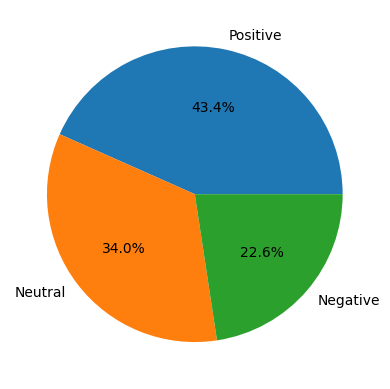

In [9]:
positiveCount = df.Sentiment.value_counts()[0]
neutralCount = df.Sentiment.value_counts()[1]
negativeCount = df.Sentiment.value_counts()[2]
arr = [positiveCount,neutralCount,negativeCount]
labels = ["Positive", "Neutral", "Negative"]
plt.pie(arr, labels=labels, autopct='%1.1f%%')


In [12]:
pos_tweets = df[df["Sentiment"] == "Positive"]
neg_tweets = df[df["Sentiment"] == "Negative"]

OptionError: "No such keys(s): 'mode.use_inf_as_null'"

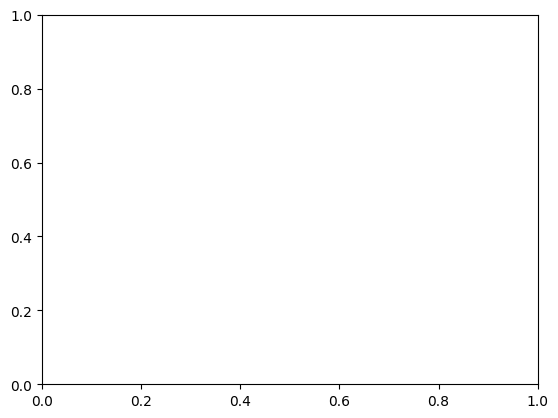

In [14]:
sns.kdeplot(pos_tweets["score"], shade=True, label="Pos")
sns.kdeplot(neg_tweets["score"], shade=True, label="Neg")
plt.xlabel("Polarity Score")
plt.ylabel("Density")
plt.title("Sentiment Analysis of Tweets")
plt.legend()
plt.show()